# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [2]:
#импортируем библиотеку pandas и matplotlib
import pandas as pd
import matplotlib.pyplot as plt

#используем параметр sep для разделения колонок 
#укажем два пути к файлу в случае ошибки 
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv("https://code.s3.yandex.net/datasets/real_estate_data.csv", sep="\t")

In [3]:
#выведем первые 20 строчек таблицы на экран
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
#выведем основную информацию о таблице с помощью метода info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Датафрейм имеет 22 столбца и 23699 строк данных. 

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

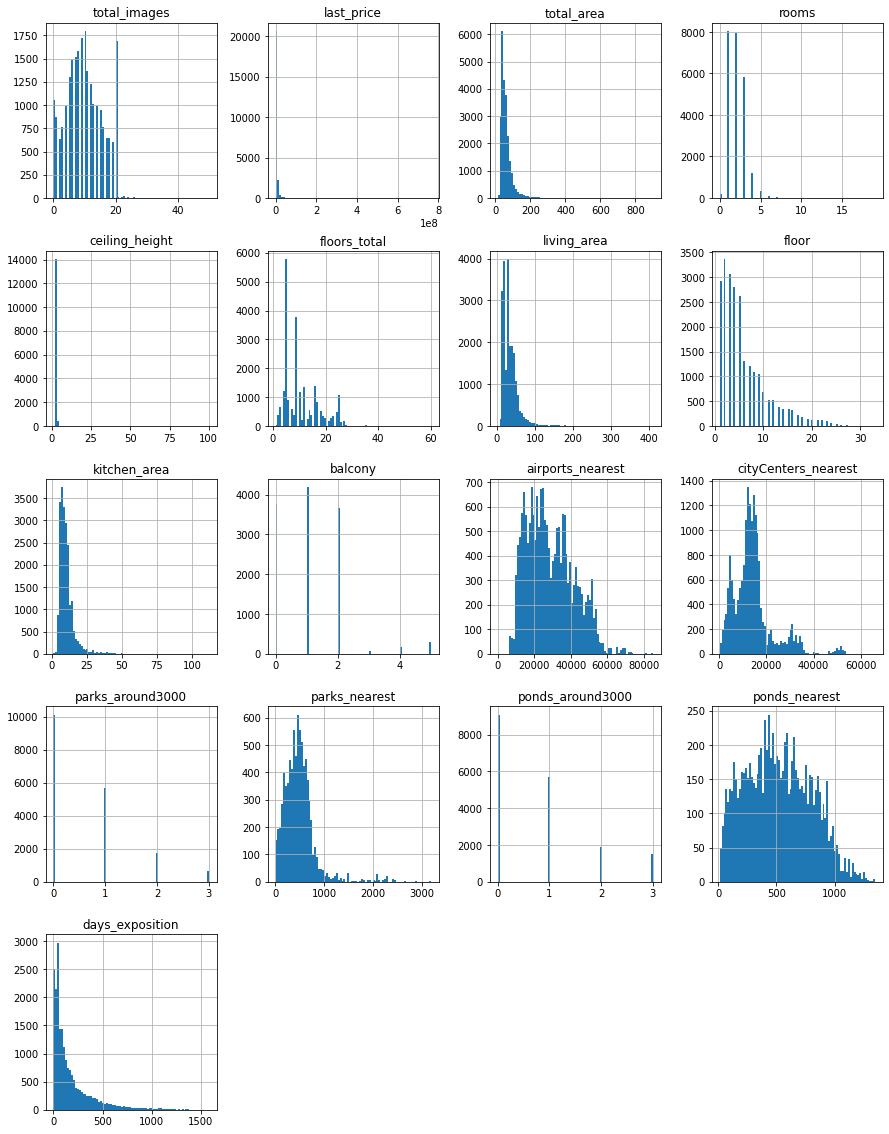

In [5]:
#построим общую гистограмму для всех столбцов таблицы
data.hist(bins=80, figsize=(15, 20))

### Предобработка данных
#### Удаление пропусков

In [6]:
#выведем количество пропущенных значений для каждого столбца
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
round(data.isna().sum() / len(data) * 100, 2)

total_images             0.00
last_price               0.00
total_area               0.00
first_day_exposition     0.00
rooms                    0.00
ceiling_height          38.80
floors_total             0.36
living_area              8.03
floor                    0.00
is_apartment            88.29
studio                   0.00
open_plan                0.00
kitchen_area             9.61
balcony                 48.61
locality_name            0.21
airports_nearest        23.38
cityCenters_nearest     23.29
parks_around3000        23.28
parks_nearest           65.91
ponds_around3000        23.28
ponds_nearest           61.56
days_exposition         13.42
dtype: float64

Не имеют пропуски следующие столбцы:\
-число фотографий квартиры в объявлении,\
-цена на момент снятия с публикации,\
-общая площадь квартиры в м²,\
-дата публикации,\
-число комнат,\
-этаж,\
-квартира-студия,\
-свободная планировка.\
Цена, общая площадь, число комнат и дата публикации важные данные при опубликовании объявления, их продавец заполняет наиболее тщательно.

In [8]:
#поищем количество одинаковых строк
data.duplicated().sum()

0

Одинаковые строки в датафрейме отсутствуют.

Пустые строки в столбе **число балконов** заполним 0. Скорее всего продавец не указал балконы, потому что они отсутствуют в данных квартирах.

In [9]:
#data['balcony'] = data['balcony'].fillna(0)
#data['balcony'].unique()

Число балконов в объявлениях указано от 0 до 5.

Пустые строки в столбах **число парков и водоемов в радиусе 3 км** также заполним 0. Продавец не указал парки и водоемы, потому что они отсутствуют в объявлениях или по данной локации нет данных.

In [10]:
#data['parks_around3000'] = data['parks_around3000'].fillna(0)
#data['parks_around3000'].unique()

In [11]:
#data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
#data['ponds_around3000'].unique()

In [12]:
columns = ['balcony', 'parks_around3000', 'ponds_around3000']
for i in columns:
    data[i] = data[i].fillna(0)
    print(data[i].unique())

[0. 2. 1. 5. 4. 3.]
[1. 0. 2. 3.]
[2. 0. 3. 1.]


Число водоемов и парков указано от 0 до 3 в объявлениях.

В столбце **апартаменты** очень много пропусков, удалять их нельзя, логически восстановить их не получится, заменим пропуски на False. 

In [13]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].unique()

array([False,  True])

Изучим данные выборки из столбца **высота потолков** с помощью метода describe.

In [14]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [15]:
#Заполним пропуски в столбце медианным значением
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()

In [16]:
#удалим пустые строки из столбца название населённого пункта, их 49 значений, что меньше 1 % выборки. 
data = data.dropna(subset=['locality_name'])

Изучим данные по трем столбцам (**общая площадь квартиры, жилая площадь и площадь кухни в м²**).

In [17]:
data[['total_area', 'living_area', 'kitchen_area']]

,total_area,living_area,kitchen_area
0,108.00,51.0,25.00
1,40.40,18.6,11.00
2,56.00,34.3,8.30
3,159.00,NaN,NaN
4,100.00,32.0,41.00
...,...,...,...
23694,133.81,73.3,13.83
23695,59.00,38.0,8.50
23696,56.70,29.7,NaN
23697,76.75,NaN,23.30


Посчитаем **общий коэффициент** занимаемой жилой и кухонной площади от общей площади:

In [18]:
total_ratio = ((data['living_area'] + data['kitchen_area'])/data['total_area']).median()
total_ratio

0.75

Посчитаем **кухонный коэффициент** занимаемой кухонной площади от общей площади:

In [19]:
kitchen_ratio = (data['kitchen_area']/data['total_area']).median()
kitchen_ratio

0.1724137931034483

Посчитаем **жилой коэффициент** занимаемой жилой площади от общей площади:

In [20]:
living_ratio = (data['living_area']/data['total_area']).median()
living_ratio

0.5678598992678503

In [21]:
#изучим выборку по площади кухни
data['kitchen_area'].describe()

count    21381.000000
mean        10.566403
std          5.901753
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [22]:
data.query('studio == True')['kitchen_area'].unique()

array([nan])

In [23]:
data.query('open_plan == True')['kitchen_area'].unique()

array([nan])

Квартиры со свободной планировкой и квартиры-студии не имеют данных по кухонной площади. Такие квартиры обычно не имеют кухню, поэтому в столбце кухонная площадь можно заполнить данные 0.

In [24]:
data.loc[(data['open_plan'] == True) | (data['studio'] == True), 'kitchen_area'] =\
    data.loc[(data['open_plan'] == True) | (data['studio'] == True), 'kitchen_area'].fillna(0)

Оставшиеся пропущенные значения кухонной площади заполним разницей между общим коэффициентом на общую площадь и жилой площадью, округлим до 1 знака после запятой.

In [25]:
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] =\
    round(data.loc[data['kitchen_area'].isna(), 'total_area'] *\
          total_ratio - data.loc[data['kitchen_area'].isna(), 'living_area'], 1)

Проверим заполненные значения, чтобы они не были меньше 0. Данная ошибка могла возникнуть из-за единого общего коэффициента для всех объявлений, хотя коэффициент может быть больше для некоторых квартир. 

In [26]:
data.query('kitchen_area < 0').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
424,14,11500000.0,98.0,2016-05-10T00:00:00,3,2.65,3.0,88.0,3,False,...,-14.5,1.0,Санкт-Петербург,39363.0,13270.0,0.0,NaN,0.0,NaN,90.0
1544,8,3300000.0,26.0,2018-03-15T00:00:00,1,2.65,16.0,20.0,6,False,...,-0.5,0.0,Санкт-Петербург,8340.0,11992.0,2.0,20.0,1.0,197.0,193.0
1842,3,13800000.0,92.0,2015-09-26T00:00:00,5,2.65,5.0,71.0,2,False,...,-2.0,0.0,Санкт-Петербург,22748.0,1884.0,3.0,136.0,2.0,835.0,326.0
2720,10,3900000.0,68.0,2018-03-13T00:00:00,3,4.00,2.0,57.0,1,False,...,-6.0,0.0,Кронштадт,68341.0,50067.0,3.0,286.0,3.0,153.0,264.0
2959,9,2550000.0,32.0,2017-12-02T00:00:00,1,2.65,14.0,30.2,13,False,...,-6.2,1.0,деревня Кудрово,NaN,NaN,0.0,NaN,0.0,NaN,157.0


Полученные объявления не будем удалять, поменяем отрицательные значения кухонной площади на 0.

In [27]:
data.loc[data['kitchen_area'] < 0, 'kitchen_area'] = 0

Теперь заполним значения жилой площади разницей между общим коэффициентом на общую площадь и кухонной площадью.

In [28]:
data.loc[data['living_area'].isna(), 'living_area'] =\
    round(data.loc[data['living_area'].isna(), 'total_area'] *\
          total_ratio - data.loc[data['living_area'].isna(), 'kitchen_area'], 1)

При проверке отрицательных значений не было найдено.

In [29]:
data.query('living_area < 0').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [30]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area              1445
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             1445
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition          3180
dtype: int64

Пропуски остались как в кухонной, так и в жилой площади. Так как пропусков в значении общей площади нет, заполним оставшиеся значения кухонной площади умножив кухонный коэффициент на общую площадь.

In [31]:
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] =\
    round(data.loc[data['kitchen_area'].isna(), 'total_area'] * kitchen_ratio, 1)

Так как вся кухонная площадь была найдена, найдем жилую площадь с помощью общего коэффициента.

In [32]:
data.loc[data['living_area'].isna(), 'living_area'] =\
    round(data.loc[data['living_area'].isna(), 'total_area'] *\
          total_ratio - data.loc[data['living_area'].isna(), 'kitchen_area'], 1)

In [33]:
#сделаем проверку на наличие отрицательных значений
data.query('living_area < 0').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Сделаем общую проверку исходных и полученных значений кухонной и жилой площади без влияния коэффициента. Выясним, не превышает ли сумма кухонной и жилой площади общую площадь.

In [34]:
data['mistake'] = data['total_area'] - data['kitchen_area'] - data['living_area']
data.query('mistake < 0').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,mistake
184,7,2600000.0,30.20,2018-02-14T00:00:00,1,2.65,9.0,26.10,5,False,...,0.0,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0,-2.10
545,9,4700000.0,23.80,2018-12-28T00:00:00,1,2.65,18.0,20.00,9,False,...,0.0,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0,-1.20
551,8,3100000.0,31.59,2018-03-08T00:00:00,1,2.70,19.0,30.55,2,False,...,2.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,70.0,-8.24
601,12,5600000.0,53.70,2017-04-18T00:00:00,2,2.50,12.0,48.30,5,False,...,2.0,Санкт-Петербург,50477.0,13252.0,2.0,220.0,1.0,1250.0,167.0,-1.60
696,1,3364930.0,34.69,2014-11-27T00:00:00,1,2.64,25.0,23.43,25,False,...,2.0,Санкт-Петербург,43396.0,12153.0,0.0,NaN,0.0,NaN,574.0,-12.17


65 значений не прошли проверку. Так как ошибка может быть как в жилой, так и в кухонной площади, а 65 значений меньше 1% выборки, то можно их удалить.

In [35]:
data = data.query('mistake > = 0')

Заполним пропущенные значения в столбце **всего этажей в доме**.

In [36]:
#найдем все пропущенные значения в данном столбце
data.query('floors_total.isna()').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,mistake
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,False,...,0.0,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0,22.40
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,False,...,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0,7.05
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,False,...,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0,21.77
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,False,...,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0,29.70
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.65,NaN,22.60,9,False,...,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0,9.70


In [37]:
#найдем медианное значение всего этажей в доме 
median_floor = data['floors_total'].median()
median_floor

9.0

Создадим функцию `new_floor()`, которая в пропущенных значениях **всего этажей в доме** заполнит пропуск медианным значением, если этаж квартиры меньше медианы, и этажом квартиры, если медианное значение будет меньше этажа. Если пропуска в столбце нет, то функция вернет значение столбца **всего этажей в доме**.

In [38]:
def new_floor(row):
    floor = row['floor']
    max_floor = row['floors_total']
    median_floor = data['floors_total'].median()

    if (pd.isna(max_floor)) & (median_floor > floor):
        return median_floor
    if (pd.isna(max_floor)) & (median_floor <= floor):
        return floor
    else:
        return max_floor

data['floors_total'] = data.apply(new_floor, axis=1)

In [39]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5514
cityCenters_nearest      5491
parks_around3000            0
parks_nearest           15540
ponds_around3000            0
ponds_nearest           14518
days_exposition          3172
mistake                     0
dtype: int64

В столбце **сколько дней было размещено объявление** пропуски оставим без изменения, скорее всего эти объявления не были сняты с публикации. Строки заполнить 0 нельзя, потому что изменится среднее и медианное значение дней размещения объявлений.

Пропуски также остались в картографических данных. Видимо была ошибка при загрузке данных, потому что пропусков слишком много. Пропуски нельзя удалить, также их нельзя заполнить ни 0, ни медианным значением, потому что это повлияет на изучения средних значений по выборке.

#### Изменение типов данных

In [40]:
#изменим тип данных object на datetime, чтобы можно было проводить операции со временем   
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [41]:
#изменим вещественный тип на целочисленный для столбцов число балконов, цены,всего этажей, число парков и водоемов в радиусе 3км
list = ['balcony', 'last_price', 'floors_total', 'parks_around3000', 'ponds_around3000']
data[list] = data[list].astype(int)

Столбец **апартаменты** при заполнении пропущенных значений поменял тип данных с object на bool.\
Столбцы с **картографическими данными** и столбец **сколько дней было размещено объявление** поменять тип данных с float на int не получится, потому что остались пропущенные значения NaN.

#### Обработка неявных дубликатов

Изучим уникальные значения в столбце **название населённого пункта**. 

In [42]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [43]:
#уберем все 'ё' в названиях и поменяем их на 'е' 
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

Создадим функции `locality_type()` и `new_locality_name()` для разделение `locality_name` на два столбца:\
-в столбце `locality_type` будет указан тип населенного пункта, как он указан в объявлении;\
-в столбце `new_locality_name` будет указано наименование населенного пункта. В дальнейшем этот столбец будет использоваться для группировки по уникальным значениям.

In [44]:
def locality_type(name):
    if pd.isna(name):
        return ''
    if 'городской поселок' in name:
        return 'городской поселок'
    if 'коттеджный поселок' in name:
        return 'коттеджный поселок'
    if 'поселок городского типа' in name:
        return 'поселок городского типа'
    if 'деревн' in name:
        return 'деревня'
    if 'поселок станции' in name:
        return 'поселок станции'
    if 'поселок при железнодорожной станции' in name:
        return 'поселок при железнодорожной станции'
    if 'садоводческое некоммерческое товарищество' in name:
        return 'садоводческое некоммерческое товарищество'
    if 'садовое товарищество' in name:
        return 'садовое товарищество'
    if 'посе' in name:
        return 'поселок'
    if 'село' in name:
        return 'село'
    else:
        return ''

data['locality_type'] = data['locality_name'].apply(locality_type)

In [45]:
def new_locality_name(row):
    type = row['locality_type']
    locality_name = row['locality_name']
    
    for row in data:
        for elem in row:
            if type == '':
                return locality_name[len(type):]
            return locality_name[(len(type) + 1):]
data['new_locality_name'] = data.apply(new_locality_name, axis=1) 

In [46]:
#выведем первые 5 строк датафрейма с 2-мя новыми столбцами: locality_type и new_locality_name
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,mistake,locality_type,new_locality_name
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,18863.0,16028.0,1,482.0,2,755.0,NaN,32.0,,Санкт-Петербург
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,12817.0,18603.0,0,NaN,0,NaN,81.0,10.8,поселок,Шушары
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,21741.0,13933.0,1,90.0,2,574.0,558.0,13.4,,Санкт-Петербург
3,0,64900000,159.0,2015-07-24,3,2.65,14,91.8,9,False,...,28098.0,6800.0,2,84.0,3,234.0,424.0,39.8,,Санкт-Петербург
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,31856.0,8098.0,2,112.0,1,48.0,121.0,27.0,,Санкт-Петербург


#### Поиск аномальных значений

In [47]:
#изучим столбец общая площадь
data['total_area'].describe()

count    23585.000000
mean        60.356895
std         35.689746
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

Площадь квартир представлена от 12 до 900 м. Данные значения не являются аномальными, на рынке недвижимости помимо стандартных квартир могут продаваться как комнаты по 12 м, так и дома/таунхаусы по 900 м.

In [48]:
#изучим уникальные значения число комнат
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

Комнаты представлены от 0 до 19 штук, большое количество комнат может быть в домах или больших коммунальных квартирах.\
Изучим более подробно нулевое значение комнат.

In [49]:
data.query('rooms == 0')['studio'].value_counts()

True     138
False     59
Name: studio, dtype: int64

In [50]:
data.query('rooms == 0')['open_plan'].value_counts()

False    138
True      59
Name: open_plan, dtype: int64

В квартирах-студиях и в квартирах со свободной планировкой не указывают количество комнат, значение комнат равно 0. 

In [51]:
#изучим уникальные значения всего этажей в доме
data['floors_total'].unique()

array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
       22,  8,  2, 10,  7, 13, 15, 20, 28, 36, 21, 35, 34, 60,  1, 29, 33,
       52, 37])

В Санкт-Петербурге самый большой многоэтажный жилой дом имеет 37 этажей.\
Изучим объявления, где этажность выше 37 этажей.

In [52]:
data.query('floors_total > 37')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,mistake,locality_type,new_locality_name
2253,12,3800000,45.5,2018-06-28,2,2.88,60,27.4,4,False,...,67763.0,49488.0,2,342.0,3,614.0,166.0,10.7,,Кронштадт
16731,9,3978000,40.0,2018-09-24,1,2.65,52,10.5,18,False,...,20728.0,12978.0,1,793.0,0,NaN,45.0,15.5,,Санкт-Петербург


Две квартиры являются жилыми, но значения этажа указано неверно. Удалим эти объявления, на общую выборку это не повлияет.

In [53]:
data = data.query('floors_total < 38')

In [54]:
#изучим уникальные значения этажа объявления
data['floor'].unique()

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31])

Аномальных значений не выявлено.

In [55]:
#изучим уникальные значения высоты потолков
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Минимальные допустимые значения высоты потолков прописаны в СП 54.13330.2016 «СНиП 31-01-2003 Здания жилые многоквартирные». В своде правил установлено, что в многоквартирных домах в центральной части России потолок должен быть не ниже 2,5 м, а в Сибири, на Дальнем Востоке и на севере Центральной России — не ниже 2,7 м.\
В нашем исследовании не будем рассматривать квартиры ниже 2,5 м.

In [56]:
#data.query('ceiling_height < 2.5').head()

In [57]:
#data.query('ceiling_height > 5').head()

Высота потолков в сталинских домах может достигать 4 м, поэтому оставим максимальную допустимую высоту потолка не больше 5 м.\
Значения свыше 25 м неправильно указаны, скорее всего это вещественные значения, приведем их к правильным значениям, разделив на 10.

In [58]:
data.loc[data['ceiling_height'] >= 25, 'ceiling_height'] = data['ceiling_height'] / 10

Удалим оставшиеся аномальные значения.

In [59]:
data = data[(data['ceiling_height'] >= 2.5) & (data['ceiling_height'] < 5)]

In [60]:
#проверим аномальные значения цены объявлений
data.query('last_price < 100000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,mistake,locality_type,new_locality_name
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,...,36421.0,9176.0,1,805.0,0,NaN,8.0,36.5,,Санкт-Петербург


Квартира в Санкт-Петербурге общей площадью 109 м не может стоить 12190 рублей, скорее всего продавец указал цены в тысячах рублей.

In [61]:
data.loc[data['last_price'] < 100000, 'last_price'] = data['last_price'] * 1000

### Посчитайте и добавьте в таблицу новые столбцы
#### Цена одного квадратного метра

In [62]:
#округлим до 1 знака после запятой
data['cost'] = round(data['last_price'] / data['total_area'], 1)

#### День недели публикации

In [63]:
data['weekday'] = data['first_day_exposition'].dt.weekday

#### Месяц публикации объявления

In [64]:
data['month'] = data['first_day_exposition'].dt.month

#### Год публикации объявления

In [65]:
data['year'] = data['first_day_exposition'].dt.year

#### Тип этажа квартиры
Создадим функцию `floor_type()` для разделения этажей квартир на значения первый, последний и другой.

In [66]:
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1)

#### Расстояние до центра города в километрах

In [67]:
data['cityCenters_km'] = round(data['cityCenters_nearest'] / 1000)

In [68]:
#выведем первые 5 строк датафрейма для проверки новых столбцов
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,mistake,locality_type,new_locality_name,cost,weekday,month,year,floor_type,cityCenters_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,NaN,32.0,,Санкт-Петербург,120370.4,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,81.0,10.8,поселок,Шушары,82920.8,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,558.0,13.4,,Санкт-Петербург,92785.7,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.65,14,91.8,9,False,...,424.0,39.8,,Санкт-Петербург,408176.1,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,121.0,27.0,,Санкт-Петербург,100000.0,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных
#### Изучение параметров объектов
##### Общая площадь

In [69]:
data['total_area'].describe()

count    23492.000000
mean        60.358241
std         35.592983
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

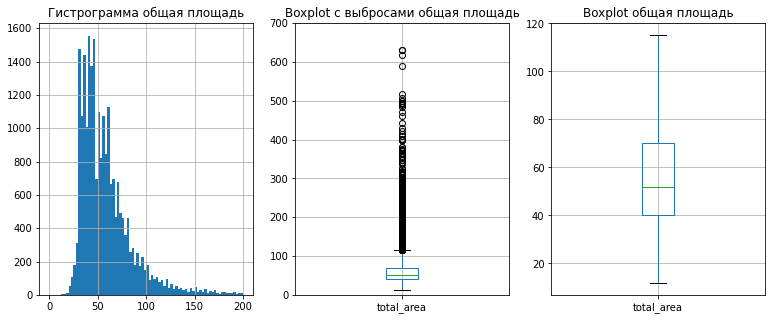

In [70]:
fig, ax = plt.subplots(1, 3, figsize=(13, 5))
ax[0].set_title('Гистрограмма общая площадь')
data['total_area'].hist(bins=80, range=(0, 200), figsize=(13, 5), ax=ax[0])
ax[1].set_title('Boxplot с выбросами общая площадь')
ax[1].set_ylim(0, 700)
data.boxplot(column='total_area', ax=ax[1])
ax[2].set_title('Boxplot общая площадь')
data.boxplot(column='total_area', figsize=(10,7), showfliers=False, ax=ax[2])
plt.show()

По графику гистограммы можно сделать вывод, что самым часто встречающимся объявлением являются квартиры с общей площадью от 30 до 50 м и от 50 до 65 м. Пики гистограммы приходятся именно на эти значения.\
По диаграмме размаха можно увидеть, что значения общей площади варьируются от 12 до 900 м. Это могут быть как комнаты, так и целые дома.\
Ориентировочная граница нормального размаха общей площади: от 12 до 110 м. Более высокие значения являются выбросами и сливаются в единую жирную линию: таких квартир очень много. И всё же значения, которые отсёк верхний «ус», — редкие.\
Стандартное отклонение велико, это связано с различной площадью представленных в объявлении объектов.\
Самыми распространенными значениями квартир с общей площадью являются от 40 до 69 м. Это могут быть 1, 2 и 3-х комнатные квартиры.

##### Жилая площадь

In [71]:
data['living_area'].describe()

count    23492.000000
mean        34.577480
std         22.509288
min          2.000000
25%         19.000000
50%         30.000000
75%         42.117500
max        413.200000
Name: living_area, dtype: float64

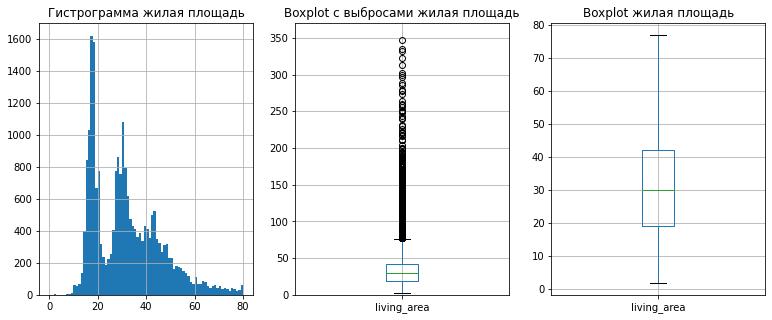

In [72]:
fig, ax = plt.subplots(1, 3, figsize=(13, 5))
ax[0].set_title('Гистрограмма жилая площадь')
data['living_area'].hist(bins=80, range=(0, 80), figsize=(13, 5), ax=ax[0])
ax[1].set_title('Boxplot с выбросами жилая площадь')
ax[1].set_ylim(0, 370)
data.boxplot(column='living_area', ax=ax[1])
ax[2].set_title('Boxplot жилая площадь')
data.boxplot(column='living_area', figsize=(10,7), showfliers=False, ax=ax[2])
plt.show()

По графику гистограммы видно, что самым часто встречающимся объявлением являются квартиры с жилой площадью 18 м и 25-35 м. Пики гистограммы приходятся именно на эти значения.\
По диаграмме размаха можно увидеть, что значения жилой площади варьируются от 2 до 413 м. Нижняя граница аномальная, это связано с погрешностью расчетов или исходных данных.\
Ориентировочная граница нормального размаха жилой площади: от 2 до 76 м.\
Стандартное отклонение велико, это связано с различной площадью представленных в объявлении объектов.\
Самыми распространенными значениями квартир с жилой площадью являются от 19 до 42 м. Это могут быть 2 и 3-х комнатные квартиры.

##### Площадь кухни

In [73]:
data['kitchen_area'].describe()

count    23492.000000
mean        10.407763
std          6.144748
min          0.000000
25%          7.000000
50%          9.000000
75%         12.000000
max        135.000000
Name: kitchen_area, dtype: float64

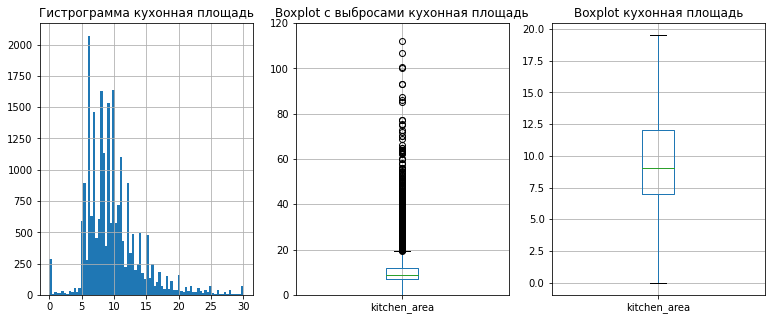

In [74]:
fig, ax = plt.subplots(1, 3, figsize=(13, 5))
ax[0].set_title('Гистрограмма кухонная площадь')
data['kitchen_area'].hist(bins=80, range=(0, 30), figsize=(13, 5), ax=ax[0])
ax[1].set_title('Boxplot с выбросами кухонная площадь')
ax[1].set_ylim(0, 120)
data.boxplot(column='kitchen_area', ax=ax[1])
ax[2].set_title('Boxplot кухонная площадь')
data.boxplot(column='kitchen_area', figsize=(10,7), showfliers=False, ax=ax[2])
plt.show()

По графику гистограммы мы видим пиковые значения кухонной площади в отметке 0 м (объявления квартиры-студии и открытые планировки), но самым часто встречающимся объявлением являются квартиры с кухонной площадью 5-12 м.\
По диаграмме размаха можно увидеть, что значения кухонной площади варьируются от 0 до 135 м.\
Ориентировочная граница нормального размаха общей площади: от 0 до 19 м. Более высокие значения являются выбросами, но квартир со значением кухонной площади от 80 м становится меньше.\
Стандартное отклонение велико, это связано с различной площадью представленных в объявлении объектов.\
Самыми распространенными значениями квартир с кухонной площадью являются от 7 до 12 м. Такие кухонные площади широко представлены в хрущевках и более новых домах без евро-кухонь.

##### Цена объекта

In [75]:
data['last_price'].describe()

count    2.349200e+04
mean     6.536899e+06
std      1.084655e+07
min      4.300000e+05
25%      3.429750e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

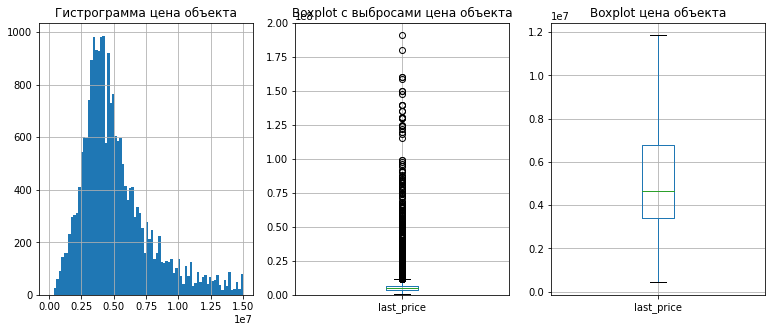

In [76]:
fig, ax = plt.subplots(1, 3, figsize=(13, 5))
ax[0].set_title('Гистрограмма цена объекта')
data['last_price'].hist(bins=80, range=(0, 15_000_000), figsize=(13, 5), ax=ax[0])
ax[1].set_title('Boxplot с выбросами цена объекта')
ax[1].set_ylim(0, 200_000_000)
data.boxplot(column='last_price', ax=ax[1])
ax[2].set_title('Boxplot цена объекта')
data.boxplot(column='last_price', figsize=(10,7), showfliers=False, ax=ax[2])
plt.show()

По графику гистограммы пиковое значение цены объявления составляет 3-4,5 миллиона рублей. Распределение цен похоже на нормальное распределение.\
По диаграмме размаха можно увидеть, что значения цен варьируются от 0,43 до 763 миллиона рублей.\
Ориентировочная граница нормального размаха цен: от 0,43 до 12 миллионов рублей. Более высокие значения являются выбросами, но объявлений со значением цен от 110 млн. руб. становится меньше.\
Стандартное отклонение велико, это связано с разными факторами, влияющими на цену объекта (площадь, расположение объекта и так далее).\
Самыми распространенными ценами объектов являются объекты стоимостью от 3,4 до 6,8 миллиона рублей. Это могут быть 1, 2 и 3-х комнатные квартиры, представленные в Санкт-Петербурге до 2019 года.

##### Количество комнат

In [77]:
data['rooms'].value_counts()

1     7976
2     7865
3     5766
4     1171
5      324
0      196
6      104
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

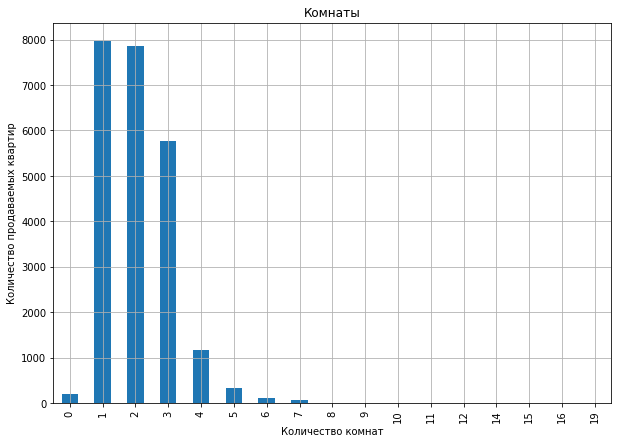

In [78]:
data.groupby('rooms')['last_price'].count()\
    .plot(kind='bar', figsize=(10,7), grid=True)
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество продаваемых квартир')
plt.show()

Количество комнат в объявлениях представлено от 0 до 19 комнат. 0 комнат указывали продавцы в квартирах-студиях и объявлениях с открытой планировкой.\
По столбчатому графику можно сделать вывод, что самыми часто встречающимися квартирами являются 1, 2, 3-х комнатные квартиры.

##### Высота потолков

In [79]:
data['ceiling_height'].describe()

count    23492.000000
mean         2.696864
std          0.214223
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.900000
Name: ceiling_height, dtype: float64

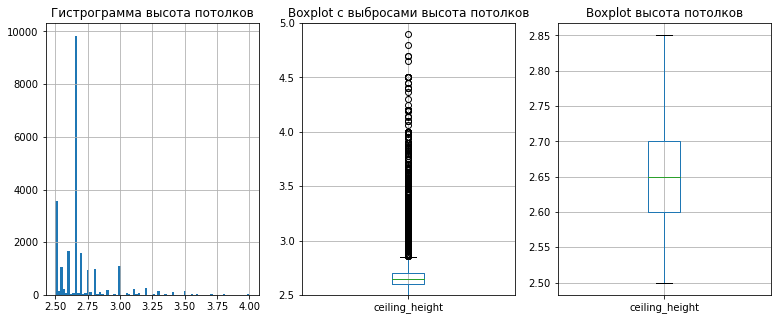

In [80]:
fig, ax = plt.subplots(1, 3, figsize=(13, 5))
ax[0].set_title('Гистрограмма высота потолков')
data['ceiling_height'].hist(bins=80, range=(2.5, 4), figsize=(13, 5), ax=ax[0])
ax[1].set_title('Boxplot с выбросами высота потолков')
ax[1].set_ylim(2.5, 5)
data.boxplot(column='ceiling_height', ax=ax[1])
ax[2].set_title('Boxplot высота потолков')
data.boxplot(column='ceiling_height', figsize=(10,7), showfliers=False, ax=ax[2])
plt.show()

В предобработке данных были убраны аномальные значения высоты потолков, в выборке остались объявления с высотой потолков от 2,5 до 4,9 м. Поэтому стандартное отклонение мало.\
По графику гистограммы пиковое значение высоты потолков составляет 2,7 м.\
Граница нормального размаха высоты потолков: от 2,5 до 2,85 м. Более высокие значения являются выбросами, но объявлений со значением высоты потолков от 4 м становится меньше.\
Самая распространенная высота потолков в объектах является от 2,6 до 2,7 м. 

##### Этаж квартиры

In [81]:
data['floor'].describe()

count    23492.000000
mean         5.892091
std          4.884034
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [82]:
data['floor'].value_counts()

2     3333
3     3049
1     2892
4     2788
5     2590
6     1293
7     1207
8     1075
9     1043
10     684
12     521
11     519
13     375
15     340
14     331
16     313
17     226
18     176
19     146
21     123
22     112
20     110
23      99
24      62
25      45
26      24
27      10
28       1
29       1
32       1
30       1
33       1
31       1
Name: floor, dtype: int64

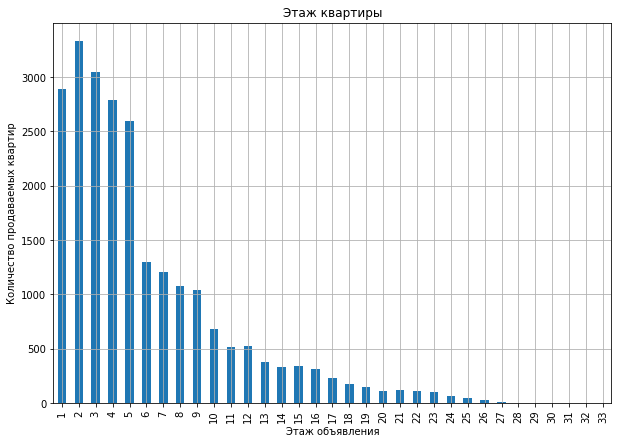

In [83]:
data.groupby('floor')['last_price'].count()\
    .plot(kind='bar', figsize=(10,7), grid=True)
plt.title('Этаж квартиры')
plt.xlabel('Этаж объявления')
plt.ylabel('Количество продаваемых квартир')
plt.show()

Значения этаж квартиры представлены от 1 до 33 этажа.\ 
По столбчатому графику можно увидеть, что самыми распространенными объявлениями являются квартиры на 2 и 3 этажах.

##### Общее количество этажей в доме

In [84]:
data['floors_total'].describe()

count    23492.000000
mean        10.682488
std          6.574450
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

In [85]:
data['floors_total'].value_counts()

5     5723
9     3791
16    1363
12    1356
4     1190
10    1174
25    1070
6      903
17     829
3      662
7      584
14     550
18     503
24     460
8      385
2      376
15     367
23     350
19     341
22     287
20     273
13     230
11     203
27     163
21     162
26     124
1       23
35      23
28      21
36       3
34       1
29       1
33       1
Name: floors_total, dtype: int64

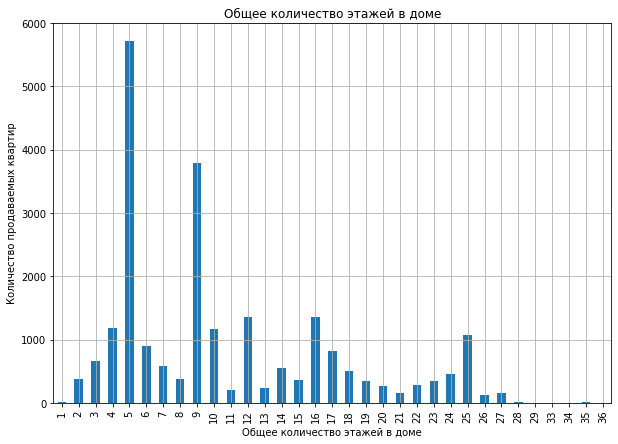

In [86]:
data.groupby('floors_total')['last_price'].count()\
    .plot(kind='bar', figsize=(10,7), grid=True)
plt.title('Общее количество этажей в доме')
plt.xlabel('Общее количество этажей в доме')
plt.ylabel('Количество продаваемых квартир')
plt.show()

В предобработке данных были убраны аномальные значения общего количества этажей дома, значения остались от 1 до 36 этажа. Значит в объявлениях представлены как индивидуальные одноэтажные дома, так и 36-этажные многоквартирные дома.\
Также при заполнении пропущенных значений использовалось медианное значение общего количества этажей дома (9 этаж), в итоге средним значением выборки стал 9 этажный дом.\
По столбчатому графику пиковое значение общего количества этажей дома составляет 5-ти этажный дом, следом идет 9-ти этажный дом. Можно сделать вывод, что в объявлениях наиболее представлены хрущевки к продажам.


##### Тип этажа квартиры

In [87]:
#Количество объявлений по типам этажей
data['floor_type'].value_counts()

другой       17266
последний     3334
первый        2892
Name: floor_type, dtype: int64

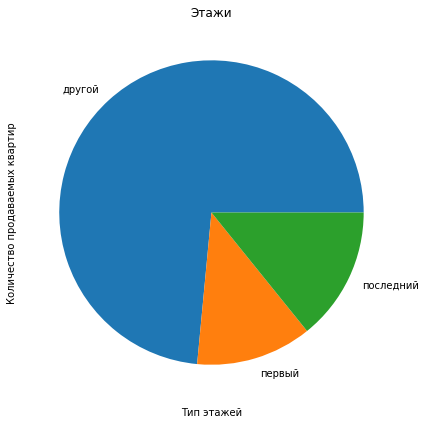

In [88]:
data.groupby('floor_type')['floor_type'].count()\
    .plot(kind='pie', figsize=(10,7), grid=True)
plt.title('Этажи')
plt.xlabel('Тип этажей')
plt.ylabel('Количество продаваемых квартир')
plt.show()

Более 75 % в объявлениях представлены квартиры не на первых и последних этажах.

##### Расстояние до центра города в метрах

In [89]:
data['cityCenters_nearest'].describe()

count    18034.000000
mean     14196.993013
std       8607.880171
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

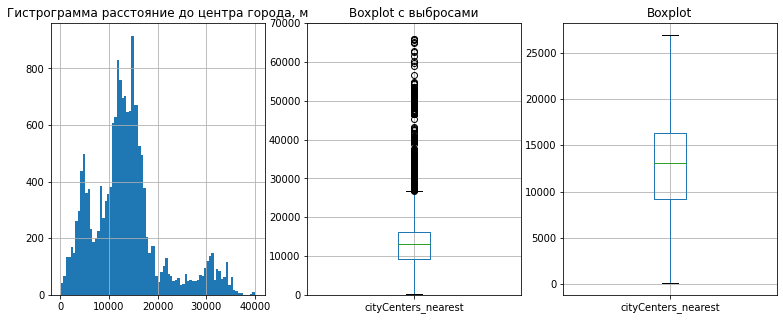

In [90]:
fig, ax = plt.subplots(1, 3, figsize=(13, 5))
data['cityCenters_nearest'].hist(bins=80, range=(150, 40000), figsize=(13, 5), ax=ax[0])
ax[1].set_ylim(0, 70000)
data.boxplot(column='cityCenters_nearest', ax=ax[1])
data.boxplot(column='cityCenters_nearest', figsize=(10,7), showfliers=False, ax=ax[2])
ax[0].set_title('Гистрограмма расстояние до центра города, м')
ax[1].set_title('Boxplot с выбросами')
ax[2].set_title('Boxplot')
plt.show()

Объявления представлены не только по Санкт-Петербургу, но и по другим населенным пунктам, поэтому разброс значений огромный, то же самое касается высокого стандартного отклонения.\
Расстояние до центра города составляет от 181 м до 66 км. По гистограмме можно сделать вывод, что среднестатистическое объявление находится на расстоянии 15 км от центра города.\
Ориентировочная граница нормального размаха расстояния до центра: от 181 м до 25 км.\
Наиболее часто объявления находятся на расстоянии 9-16 км.

##### Расстояние  до ближайшего аэропорта

In [91]:
data['airports_nearest'].describe()

count    18011.000000
mean     28808.022153
std      12637.726579
min          0.000000
25%      18577.000000
50%      26758.000000
75%      37310.000000
max      84869.000000
Name: airports_nearest, dtype: float64

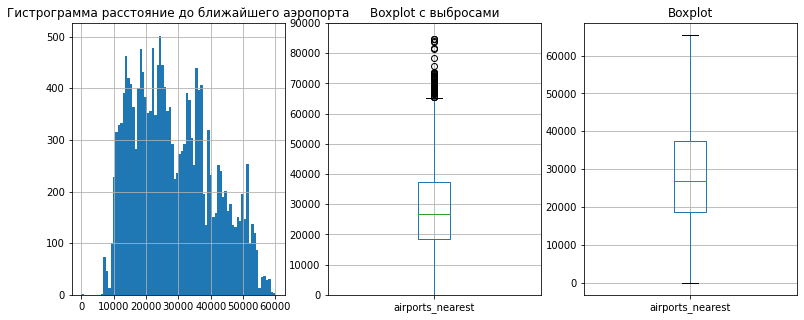

In [92]:
fig, ax = plt.subplots(1, 3, figsize=(13, 5))
data['airports_nearest'].hist(bins=80, range=(0, 60000), figsize=(13, 5), ax=ax[0])
ax[1].set_ylim(0, 90000)
data.boxplot(column='airports_nearest', ax=ax[1])
data.boxplot(column='airports_nearest', figsize=(10,7), showfliers=False, ax=ax[2])
ax[0].set_title('Гистрограмма расстояние до ближайшего аэропорта')
ax[1].set_title('Boxplot с выбросами')
ax[2].set_title('Boxplot')
plt.show()

Ситуация аналогичная с расстоянием до центра города, стандартное отклонение высокое.\
По гистограмме можно сделать вывод, что среднестатистическое объявление находится на расстоянии 12-38 км от аэропорта.\
Есть объявления, которые находятся в самом аэропорту.\
Ориентировочная граница нормального размаха расстояния до аэропорта: от 0 м до 65 км.
Наиболее часто объявления находятся на расстоянии от аэропорта 18,5 - 37 км.


##### Расстояние до ближайшего парка

In [93]:
data['parks_nearest'].describe()

count    8006.000000
mean      491.052336
std       342.741023
min         1.000000
25%       288.000000
50%       454.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

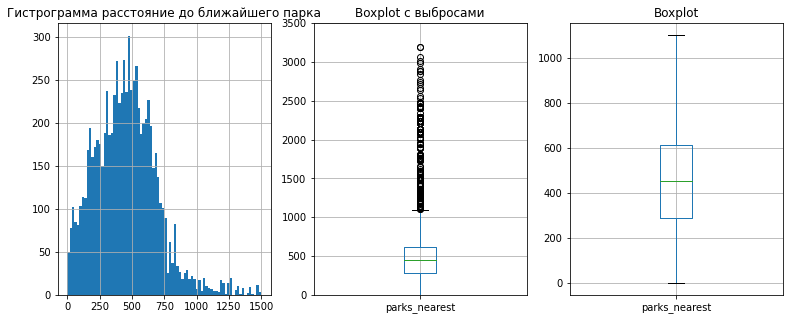

In [94]:
fig, ax = plt.subplots(1, 3, figsize=(13, 5))
data['parks_nearest'].hist(bins=80, range=(0, 1500), figsize=(13, 5), ax=ax[0])
ax[1].set_ylim(0, 3500)
data.boxplot(column='parks_nearest', ax=ax[1])
data.boxplot(column='parks_nearest', figsize=(10,7), showfliers=False, ax=ax[2])
ax[0].set_title('Гистрограмма расстояние до ближайшего парка')
ax[1].set_title('Boxplot с выбросами')
ax[2].set_title('Boxplot')
plt.show()

Квартиры из объявлений находятся или в самом парке (1 м) или до длижайщего парка идти свыше 3,2 км.
Стандартное отклонение мало в связи с небольшим разбросом данных.\
По гистограмме можно сделать вывод, что среднестатистическое объявление находится на расстоянии 200-750 м от парка или в 2-10 минутах ходьбы.\
Ориентировочная граница нормального размаха расстояния до парка: от 1 м до 1,2 км.\
Наиболее часто объявления находятся на расстоянии 288-612 м.


##### День публикации объявления

In [95]:
data['weekday'].value_counts()

3    4261
1    4147
4    3969
2    3938
0    3574
5    1929
6    1674
Name: weekday, dtype: int64

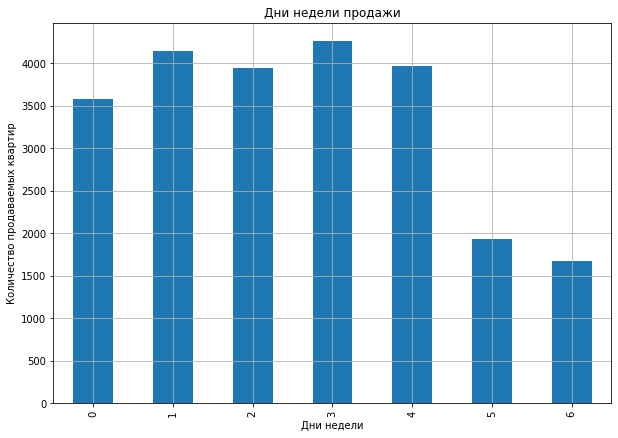

In [96]:
data.groupby('weekday')['last_price'].count()\
    .plot(kind='bar', figsize=(10,7), grid=True)
plt.title('Дни недели продажи')
plt.xlabel('Дни недели')
plt.ylabel('Количество продаваемых квартир')
plt.show()

Наиболее часто объявления публикуют по четвергам, вторникам и пятницам.

##### Месяц публикации объявления

In [97]:
data['month'].value_counts()

2     2619
3     2567
4     2358
11    2353
10    2107
9     1966
6     1743
8     1731
7     1678
12    1630
1     1484
5     1256
Name: month, dtype: int64

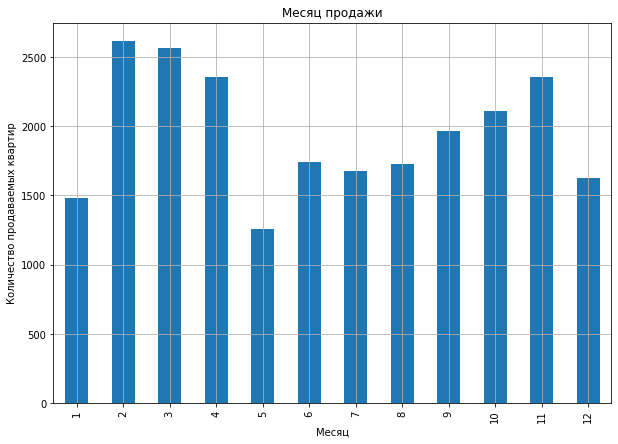

In [98]:
data.groupby('month')['last_price'].count()\
    .plot(kind='bar', figsize=(10,7), grid=True)
plt.title('Месяц продажи')
plt.xlabel('Месяц')
plt.ylabel('Количество продаваемых квартир')
plt.show()

Больше всего объявлений было опубликовано в феврале, марте и апреле.

#### Скорость продажи квартиры

In [99]:
data['days_exposition'].describe()

count    20333.000000
mean       180.891851
std        220.019815
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

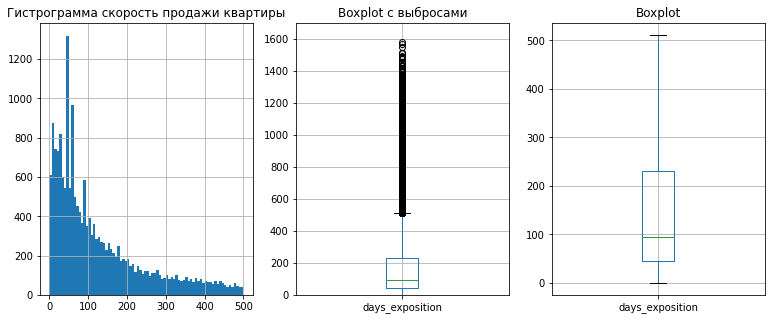

In [100]:
fig, ax = plt.subplots(1, 3, figsize=(13, 5))
data['days_exposition'].hist(bins=80, range=(0, 500), figsize=(13, 5), ax=ax[0])
ax[1].set_ylim(0, 1700)
data.boxplot(column='days_exposition', ax=ax[1])
data.boxplot(column='days_exposition', figsize=(10,7), showfliers=False, ax=ax[2])
ax[0].set_title('Гистрограмма скорость продажи квартиры')
ax[1].set_title('Boxplot с выбросами')
ax[2].set_title('Boxplot')
plt.show()

Самая быстрая продажа квартиры заняла 1 день, наиболее долгая - больше 4 лет (1580 дней).\
Чаще всего квартиры продают за 50 дней, что видно по пику гистограммы.\
Ориентировочная граница нормального размаха продаж квартир составляет от 1 до 500 дней, но в основном объявления "висят" в продаже от 45 до 231 дней.

#### Факторы, влияющие на общую (полную) стоимость объекта

##### Зависимость цены от общей площади

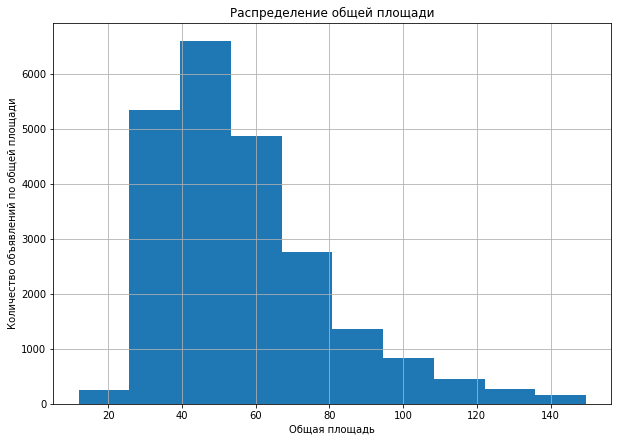

In [101]:
#отобразим объявления по общей площади до 150 м
data.loc[data['total_area'] < 150].hist(column='total_area', grid=True, figsize=(10,7))
plt.title('Распределение общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Количество объявлений по общей площади')
plt.show()

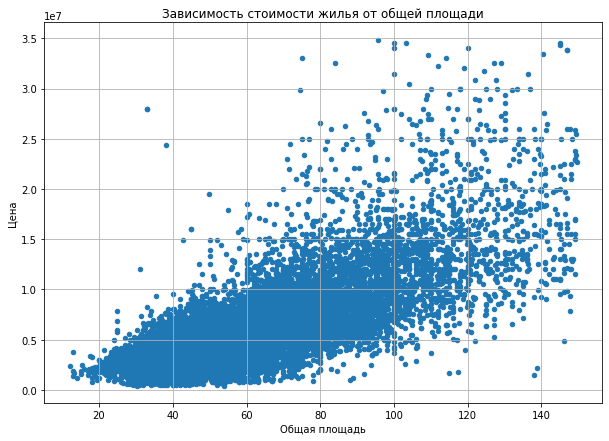

In [102]:
#с помощью сводной таблицы и графика рассеивания отобразим зависимость цены от общей площади, цену укажем до 35 млн. руб.
data.loc[(data['total_area'] < 150) & (data['last_price'] < 35_000_000)]\
    .plot.scatter(x='total_area', y='last_price', grid=True, figsize=(10,7))
plt.title('Зависимость стоимости жилья от общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Цена')
plt.show()

Можно проследить линейную зависимость цены от общей площади недвижимости: чем площадь больше, тем цена выше. Существует один выброс, но он не существенный.

##### Зависимость цены от жилой площади

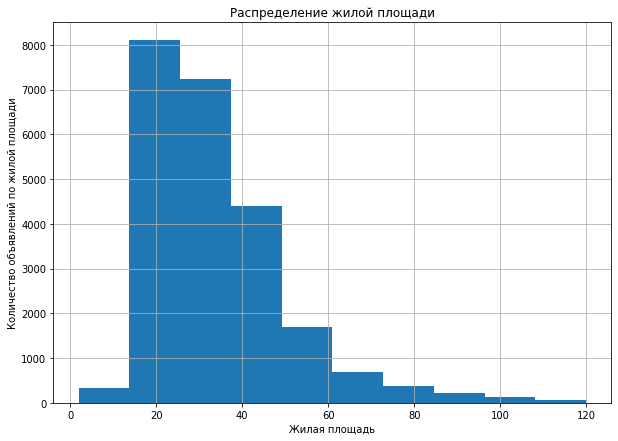

In [103]:
#отобразим объявления по жилой площади до 120 м
data.loc[data['living_area'] < 120].hist(column='living_area', grid=True, figsize=(10,7))
plt.title('Распределение жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество объявлений по жилой площади')
plt.show()

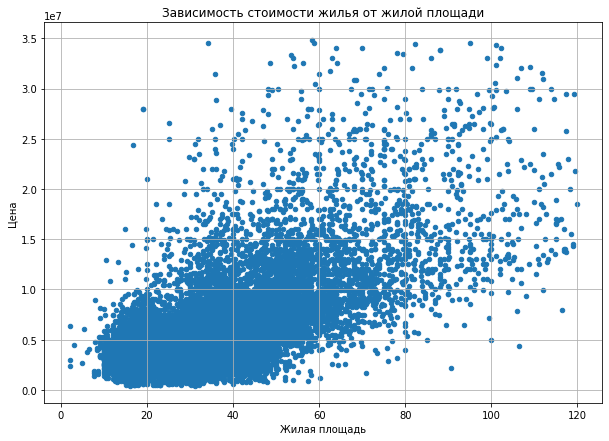

In [104]:
#с помощью сводной таблицы и графика рассеивания отобразим зависимость цены от жилой площади, цену укажем до 35 млн. руб.
data.loc[(data['living_area'] < 120) & (data['last_price'] < 35_000_000)]\
    .plot.scatter(x='living_area', y='last_price', grid=True, figsize=(10,7))
plt.title('Зависимость стоимости жилья от жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена')
plt.show()

Можно также проследить линейную зависимость цены от жилой площади недвижимости, но выбросов становится больше. То есть у большего количества объявлений будет отсутствовать зависимость, корреляция стремится к 0.

##### Зависимость цены от площади кухни

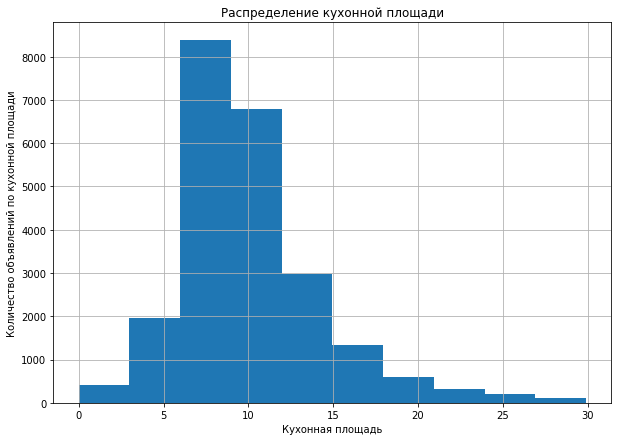

In [105]:
#отобразим объявления по кухонной площади до 30 м
data.loc[data['kitchen_area'] < 30].hist(column='kitchen_area', grid=True, figsize=(10,7))
plt.title('Распределение кухонной площади')
plt.xlabel('Кухонная площадь')
plt.ylabel('Количество объявлений по кухонной площади')
plt.show()

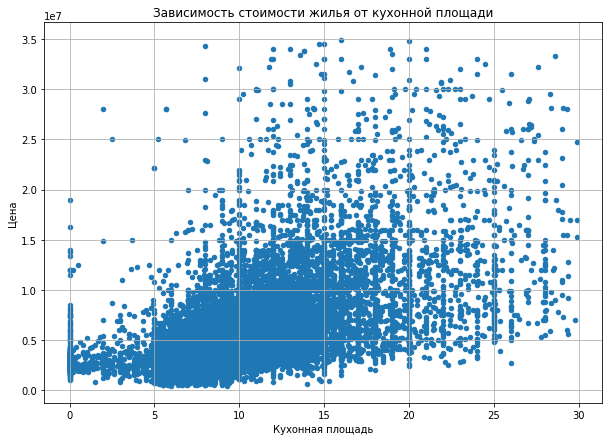

In [106]:
#с помощью сводной таблицы и графика рассеивания отобразим зависимость цены от кухонной площади, цену укажем до 35 млн. руб.
data.loc[(data['kitchen_area'] < 30) & (data['last_price'] < 35_000_000)]\
    .plot.scatter(x='kitchen_area', y='last_price', grid=True, figsize=(10,7))
plt.title('Зависимость стоимости жилья от кухонной площади')
plt.xlabel('Кухонная площадь')
plt.ylabel('Цена')
plt.show()

Линейная зависимость цены от кухонной площади прослеживается от 0 до 12 м кухни. Затем корреляция начинает стремится к 0.

##### Зависимость цены от этажа, на котором расположена квартира

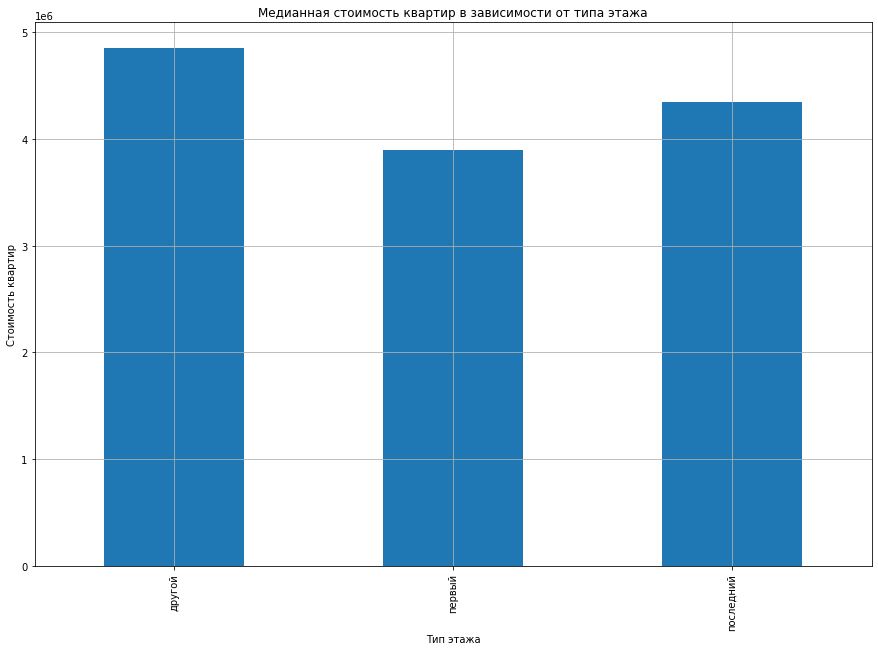

In [107]:
data.groupby('floor_type')['last_price'].median().plot(kind='bar', figsize=(15, 10), grid=True)
plt.title('Медианная стоимость квартир в зависимости от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Стоимость квартир')
plt.show()

<AxesSubplot:>

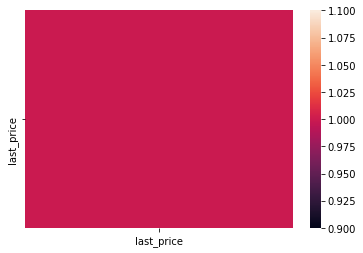

In [108]:
import seaborn as sns
df = data[['floor_type', 'last_price']]
sns.heatmap(df.corr())

Самая дешевая цена квартиры будет на первом этаже. Самая дорогая - не на последнем этаже. 

##### Зависимость цены от количества комнат

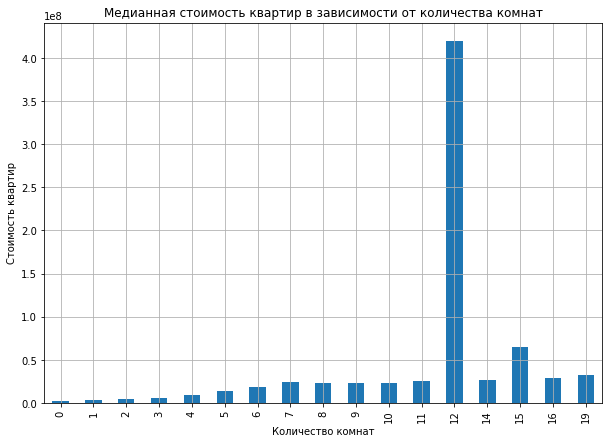

In [109]:
data.groupby('rooms')['last_price'].median()\
    .plot(kind='bar', figsize=(10,7), grid=True)
plt.title('Медианная стоимость квартир в зависимости от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость квартир')
plt.show()

Можно проследить зависимость от количества комнат в объявлениях, наиболее дорогая стоимость квартир в объектах с 12 и 15 комнатами.

##### Зависимость цены от дня размещения объявления

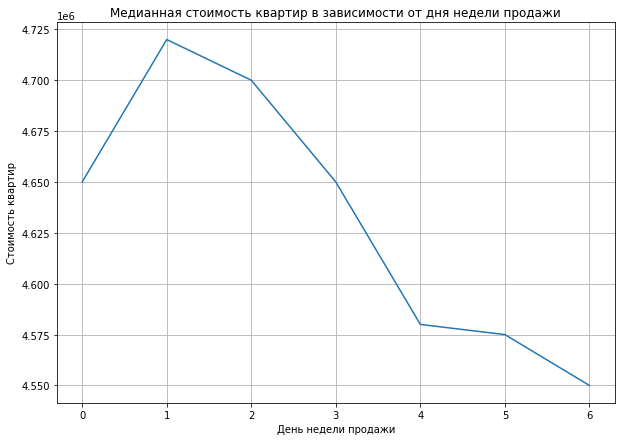

In [110]:
data.groupby('weekday')['last_price'].median()\
    .plot(figsize=(10,7), grid=True)
plt.title('Медианная стоимость квартир в зависимости от дня недели продажи')
plt.xlabel('День недели продажи')
plt.ylabel('Стоимость квартир')
plt.show()

Во вторник цена публикации выше.

##### Зависимость цены от месяца размещения объявления

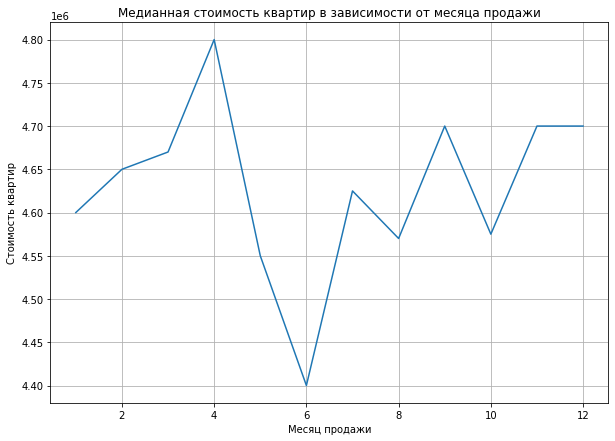

In [111]:
data.groupby('month')['last_price'].median()\
    .plot(figsize=(10,7), grid=True)
plt.title('Медианная стоимость квартир в зависимости от месяца продажи')
plt.xlabel('Месяц продажи')
plt.ylabel('Стоимость квартир')
plt.show()

В апреле цена объявлений наиболее дороже. 

##### Зависимость цены от года размещения объявления

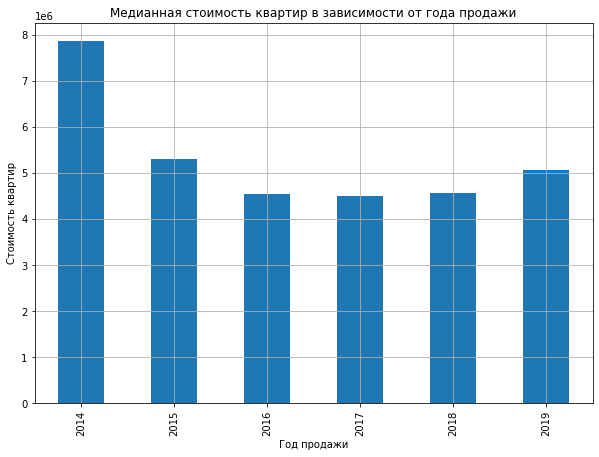

In [112]:
data.groupby('year')['last_price'].median()\
    .plot(kind='bar', figsize=(10,7), grid=True)
plt.title('Медианная стоимость квартир в зависимости от года продажи')
plt.xlabel('Год продажи')
plt.ylabel('Стоимость квартир')
plt.show()

В 2014 году цены на квартиры были дороже, чем за 2015-2019 года.

#### Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

С помощью сводной таблицы, используя столбец `new_locality_name` без указания типа населенного пункта найдем населенные пункты с наибольшим числом объявлений.

In [113]:
data.pivot_table(index='new_locality_name', values='cost', aggfunc=('count', 'median', 'max', 'min'))\
.sort_values('count', ascending=False).head(10)

,count,max,median,min
new_locality_name,,,,
Санкт-Петербург,15632,1907500.0,104727.05,15345.3
Мурино,587,138580.2,86111.10,50000.0
Кудрово,471,160401.0,95762.70,54160.3
Шушары,439,147826.1,76829.30,47700.4
Всеволожск,394,640422.4,65789.50,31400.0
Пушкин,366,256521.7,99993.60,59836.1
Колпино,336,125000.0,74729.20,47957.4
Парголово,325,138522.4,91642.90,39206.0
Гатчина,303,146315.8,67647.10,10507.2


Самое большое количество объявлений представлено в г. Санкт-Петербурге, также здесь находится объявление с максимальной стоимостью квадратного метра (1907500 рублей за 1 квадратный метр).\
Минимальная стоимость квадратного метра представлена в Гатчине.
Средняя цена одного квадратного метра представлена в столбце `median`.

#### Средняя цена каждого километра квартиры до центра г. Санкт-Петербурга

Отобразим данные на столбчатой диаграмме.\
    Сделаем срез с помощью метода `query()`, отобрав строки таблицы, где название населенного пункта будет Санкт-Петербург. Для данного среза применим сводную таблицу, посчитав среднюю стоимость квадратного метра `cost`.

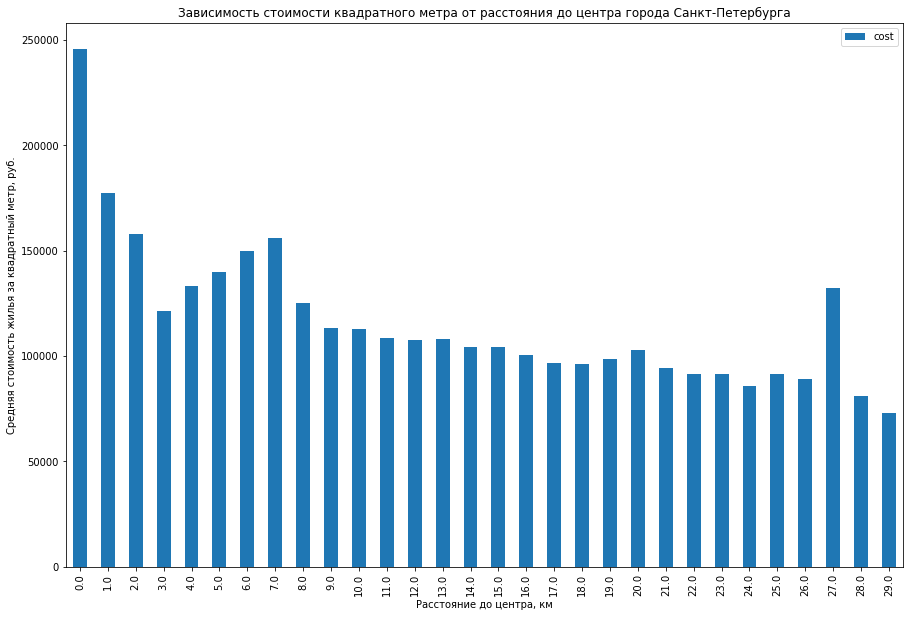

In [114]:
(data.query('new_locality_name == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_km', values='cost', aggfunc='mean')
).plot(kind='bar', figsize=(15, 10))
plt.title('Зависимость стоимости квадратного метра от расстояния до центра города Санкт-Петербурга')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Средняя стоимость жилья за квадратный метр, руб.')
plt.show()

Можно проследить линейную зависимость стоимости жилья 1 квадратного метра от расстояния до центра города, чем ближе центр, тем жилье дороже. Однако на расстоянии 27 км стоимость повышается , возможно там расположена локация, на цену которой влияет другой фактор (например, объекты бизнес-класса или индивидуальная застройка).

### Общий вывод

Проанализировав базу объявлений о продаже недвижимого имущества можно сделать следующие выводы.

1. При обработке данных было выявлено:
-большое количество пропусков в картографических данных, ошибки в указании населенных пунктах (нет общей системы). В объявлениях часто не были указаны кухоные и жилые площади, не заполнялись данные по балконам и по апартаментам, пропуски по общей этажности домов.\
-некорректно были заполнены данные о высоте потолков, очень много аномальных значений для корректировки. Мало ошибок в указании стоимости и этажности дома.\
-продавцы точно заполняли общую площадь и стоимость объекта.

2. Наиболее часто в объявлениях указаны квартиры:
-1, 2 и 3-х комнатные квартиры на 2 и 3 этажах 5-ти и 9-ти этажных домов 
-общей площадью от 40 до 69 м\
-жилой площадью от 19 до 42 м\
-кухонной площадью от 7 до 12 м\
-стоимостью объекта от 3,4 до 6,8 миллиона рублей\
-высотой потолков от 2,6 до 2,7 м.\
-находятся на расстоянии 9 - 16 км от центра города.\
-от аэропорта на расстоянии 18,5 - 37 км\
-до ближайшего парка на расстоянии 300-600 м.

3. Объявления наиболее чаще всего публикуются в четверг и в феврале.

4. В среднем квартира продается от 45 до 231 дней.

5. На общую стоимость объекта влияет общая площадь, жилая и кухонная в меньшей степени.  Также влияет этаж (не первый и не последний), количество комнат и год продажи (2014 год цена объектов была дороже).



# 